In [1]:
import numpy as np
import matplotlib.pyplot as plt

from abacusnbody.analysis.power_spectrum import calc_power

# load data
power_test_data = dict(**np.load("../../../tests/data_power/test_pos.npz"))
Lbox = 1000.
x = power_test_data['x']
y = power_test_data['y']
z = power_test_data['z']

In [2]:
# specifications of the power spectrum computation
interlaced = True
compensated = True
paste = 'TSC'
nmesh = 72
nbins_mu = 4
logk = False
k_hMpc_max = np.pi*nmesh/Lbox + 1.e-6
nbins_k = nmesh//2
poles = [0, 2, 4]

# compute power
k_binc, mu_binc, Pkmu, Nkmu, binned_poles, Npoles = calc_power(x, y, z, nbins_k, nbins_mu, k_hMpc_max, logk,
                                                               Lbox, paste, nmesh, compensated, interlaced, poles=poles)


/global/u1/b/boryanah/repos/abacusutils/abacusnbody/analysis/power_spectrum.py:588: UserWarning: npartition 36 not large enough to use all 256 threads; should be 2*nthread
  tsc_parallel(pos, field, Lbox, weights=w)


field, pos float32 float32


/global/u1/b/boryanah/repos/abacusutils/abacusnbody/analysis/power_spectrum.py:586: UserWarning: npartition 36 not large enough to use all 256 threads; should be 2*nthread
  tsc_parallel(pos + np.float32(d), field, Lbox, weights=w)


shift float32 float32
field fft complex64


In [3]:
# load presaved nbodykit computation
comp_str = "_compensated" if compensated else ""
int_str = "_interlaced" if interlaced else ""
fn = f"../../../tests/data_power/nbody_{paste}{comp_str}{int_str}.npz"
data = np.load(fn)
k_nbody = data['k']
Pkmu_nbody = data['power'].real
Pell_nbody = data['power_ell'].real

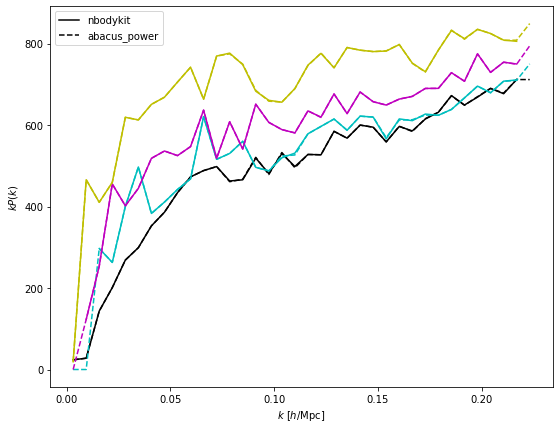

In [4]:
# plot and compare
colors = ['k', 'c', 'm', 'y']
plt.figure(figsize=(9, 7))
for i in range(nbins_mu):
    if i == 0:
        label1 = 'nbodykit'
        label2 = 'abacus_power'
    else:
        label1 = label2 = None
    plt.plot(k_nbody, Pkmu_nbody[:, i] * k_nbody, c=colors[i], label=label1)
    plt.plot(k_binc, Pkmu[:, i] * k_binc, c=colors[i], ls='--', label=label2)
plt.ylabel(r"$k P(k)$")
plt.xlabel(r"$k \ [h/{\rm Mpc}]$")
plt.legend()

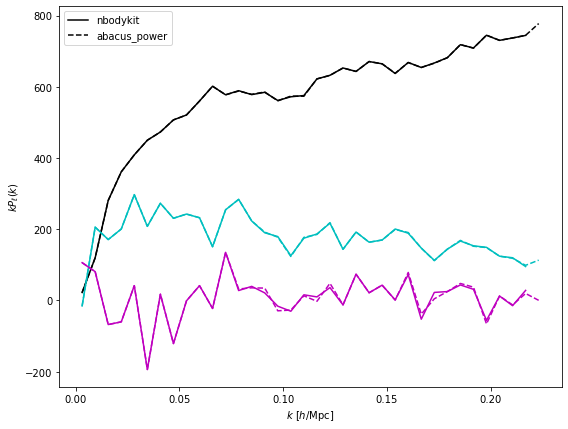

In [5]:
# plot and compare
plt.figure(figsize=(9, 7))
for i in range(len(poles)):
    if i == 0:
        label1 = 'nbodykit'
        label2 = 'abacus_power'
    else:
        label1 = label2 = None
    plt.plot(k_nbody, Pell_nbody[i, :] * k_nbody, c=colors[i], label=label1)
    plt.plot(k_binc, binned_poles[i, :] * k_binc, c=colors[i], ls='--', label=label2)
plt.ylabel(r"$k P_\ell(k)$")
plt.xlabel(r"$k \ [h/{\rm Mpc}]$")
plt.legend()